In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.loadtxt("/content/M_2.txt")
df = pd.DataFrame(data)

In [ ]:
df = df.drop(columns=1)
df.head()

,0,2,3,4,5,6,7,8,9,10,...,622,623,624,625,626,627,628,629,630,631
0,1.0,0.179021,0.690598,0.106307,-0.874411,0.534781,0.944589,1.042887,-0.447626,0.670869,...,0.707322,-0.413054,1.579281,0.577339,-0.210420,-0.096947,1.914895,0.164310,2.423030,0.940309
1,1.0,-0.392490,1.380636,-0.506769,-1.342105,-1.024075,-1.476238,1.439298,-0.912754,-1.030290,...,-0.183109,-0.837541,1.669477,-1.687489,-1.435424,-2.126351,0.812081,0.534858,2.358621,-1.840876
2,1.0,-0.264944,0.291899,-1.174263,-1.706030,-0.831943,-0.919606,0.322527,-1.214675,-0.565001,...,-0.552510,-1.277416,0.588301,-1.513276,-1.719922,-1.631825,0.286730,-0.286559,1.273157,-1.124130
3,1.0,-0.002269,0.714463,-0.928275,-0.546158,-0.803237,0.024654,0.596932,-0.345179,-0.615986,...,0.633401,-1.269364,0.296169,-0.454143,-0.024468,-0.546091,1.360139,-0.979954,1.461883,-0.152339
4,1.0,-0.138267,0.311905,0.501269,-1.545965,-0.797499,-0.582358,0.025408,0.376933,-0.038809,...,1.184483,-0.732250,2.106686,0.232933,-0.312752,-0.625347,1.790285,0.618412,3.044807,-0.063636


## 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

##### Accuracy with imbalanced sample #####
print("----- Imbalanced sample -----")
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]
kf = StratifiedKFold(n_splits=5, shuffle=True)
clf = SVC(kernel='linear')
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.90      0.97      0.93        90
         2.0       0.76      0.78      0.77        90
         3.0       0.90      0.94      0.92        90
         4.0       0.94      0.91      0.93        90
         5.0       0.81      0.78      0.80        90
         6.0       0.83      0.78      0.80        90
         7.0       0.92      0.92      0.92        90

    accuracy                           0.87       630
   macro avg       0.87      0.87      0.87       630
weighted avg       0.87      0.87      0.87       630



In [ ]:
print("----- Subsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

    # Subsample the majority class to balance the data
    x1 = x_train[y_train == 1]
    y1 = y_train[y_train == 1]
    n1 = len(y1)
    x2 = x_train[y_train == 2]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Randomly select a subset of the majority class
    ind = random.sample(range(n2), n1)
    x_sub = pd.concat([x1, x2.iloc[ind]], axis=0)
    y_sub = pd.concat([y1, y2.iloc[ind]], axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), zero_division='warn'))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

    # Upsample the minority class to balance the data
    x1 = x_train[y_train == 1]
    y1 = y_train[y_train == 1]
    n1 = len(y1)
    x2 = x_train[y_train == 2]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Randomly select with replacement from the minority class to match the majority class
    ind = random.choices(range(n1), k=n2)
    x_sub = pd.concat([x1.iloc[ind], x2], axis=0)
    y_sub = pd.concat([y1.iloc[ind], y2], axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),zero_division='warn'))

##### Accuracy with balanced sample (weighted loss function) #####
print("----- Weighted loss function -----")
x = df.iloc[:, 1:]  # Reset x to include all features
y = df.iloc[:, 0]
clf = SVC(kernel='linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),zero_division='warn'))

----- Subsampling -----
              precision    recall  f1-score   support

         1.0       0.55      0.99      0.71        90
         2.0       0.19      0.98      0.32        90
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00        90
         5.0       0.00      0.00      0.00        90
         6.0       0.00      0.00      0.00        90
         7.0       0.00      0.00      0.00        90

    accuracy                           0.28       630
   macro avg       0.11      0.28      0.15       630
weighted avg       0.11      0.28      0.15       630

----- Upsampling -----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         1.0       0.49      0.96      0.65        90
         2.0       0.19      0.98      0.32        90
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00        90
         5.0       0.00      0.00      0.00        90
         6.0       0.00      0.00      0.00        90
         7.0       0.00      0.00      0.00        90

    accuracy                           0.28       630
   macro avg       0.10      0.28      0.14       630
weighted avg       0.10      0.28      0.14       630

----- Weighted loss function -----
              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91        90
         2.0       0.68      0.78      0.73        90
         3.0       0.92      0.94      0.93        90
         4.0       0.95      0.87      0.91        90
         5.0       0.80      0.73      0.76        90
         6.0       0.80      0.72      0.76

Al igual que el ejercicio anterior, no veo necesario balancear los datos de acuerdo a estos resultados.

## 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [ ]:
df.iloc[:, 0].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
features = df.columns
n_features = len(features)

631

In [ ]:
# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]  # Use DataFrame indexing
    y_train = y.iloc[train_index]  # Use DataFrame indexing
    x_test = x.iloc[test_index]    # Use DataFrame indexing
    y_test = y.iloc[test_index]    # Use DataFrame indexing

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = SVC(kernel='rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.86      0.91      0.89        90
         2.0       0.71      0.79      0.75        90
         3.0       0.92      0.93      0.93        90
         4.0       0.92      0.86      0.89        90
         5.0       0.79      0.77      0.78        90
         6.0       0.78      0.70      0.74        90
         7.0       0.91      0.93      0.92        90

    accuracy                           0.84       630
   macro avg       0.84      0.84      0.84       630
weighted avg       0.84      0.84      0.84       630

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.92      0.91      0.92        90
         2.0       0.68      0.86      0.76        90
         3.0       0.95      0.93      0.94        90
         4.0       0.92      0.91      0.92        90
         5.0       0.79      0.76      0.77        90
         6.0       0.89      0.61  

## 3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

usamos los dos clasificadores linear-SVM y RBF-SVM que fueron los que nos dieron mejores resultado en el paso anterior. Incluyo el KNN que fue el tercer mejor clasificador para hacer 3 diferentes.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
features = df.columns
n_features = len(features)
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.8587301587301587
---- C = 0.0010974987654930556
ACC: 0.8634920634920636
---- C = 0.0012045035402587824
ACC: 0.8587301587301589
---- C = 0.0013219411484660286
ACC: 0.8666666666666668
---- C = 0.0014508287784959402
ACC: 0.865079365079365
---- C = 0.0015922827933410922
ACC: 0.86984126984127
---- C = 0.001747528400007683
ACC: 0.8682539682539682
---- C = 0.0019179102616724887
ACC: 0.8555555555555555
---- C = 0.00210490414451202
ACC: 0.8777777777777779
---- C = 0.0023101297000831605
ACC: 0.865079365079365
---- C = 0.0025353644939701114
ACC: 0.86984126984127
---- C = 0.0027825594022071257
ACC: 0.8746031746031747
---- C = 0.0030538555088334154
ACC: 0.8619047619047618
---- C = 0.003351602650938841
ACC: 0.865079365079365
---- C = 0.0036783797718286343
ACC: 0.8777777777777777
---- C = 0.004037017258596553
ACC: 0.8682539682539684
---- C = 0.004430621457583882
ACC: 0.8587301587301587
---- C = 0.004862601580065354
ACC: 0.869

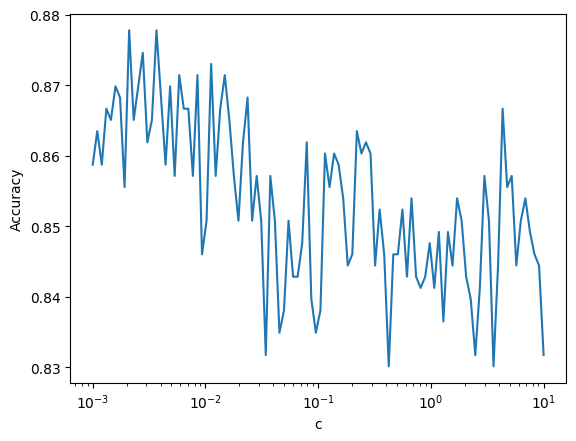

SVC(C=0.00210490414451202, kernel='linear')

In [ ]:
################################################################################
# Regularization parameter of the linear SVM classifier
################################################################################
print("----- SVM classifier - Regularization parameter -----")
# aqui hacemos un array cc con 100 valores que estan espaciados logarítmicamente entre 10^-3 y 10^1.
cc = np.logspace(-3, 1, 100)
acc = []

for c in cc:
    print('---- C =', c)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(C=c, kernel='linear')
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel='linear')
clf.fit(x, y)


In [ ]:
features = df.columns
n_features = len(features)
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]

----- RB-SVM classifier - Smoothing parameter -----
---- gamma = 1e-05
ACC: 0.6555555555555557
---- gamma = 1.0974987654930568e-05
ACC: 0.6634920634920636
---- gamma = 1.2045035402587812e-05
ACC: 0.6587301587301587
---- gamma = 1.3219411484660286e-05
ACC: 0.6841269841269841
---- gamma = 1.4508287784959402e-05
ACC: 0.673015873015873
---- gamma = 1.5922827933410938e-05
ACC: 0.6825396825396826
---- gamma = 1.747528400007683e-05
ACC: 0.6793650793650794
---- gamma = 1.917910261672489e-05
ACC: 0.6952380952380952
---- gamma = 2.104904144512022e-05
ACC: 0.7031746031746031
---- gamma = 2.310129700083158e-05
ACC: 0.7047619047619047
---- gamma = 2.5353644939701114e-05
ACC: 0.7158730158730158
---- gamma = 2.782559402207126e-05
ACC: 0.7222222222222223
---- gamma = 3.053855508833412e-05
ACC: 0.7269841269841271
---- gamma = 3.351602650938841e-05
ACC: 0.7380952380952381
---- gamma = 3.678379771828634e-05
ACC: 0.7396825396825397
---- gamma = 4.037017258596558e-05
ACC: 0.7412698412698413
---- gamma = 4.

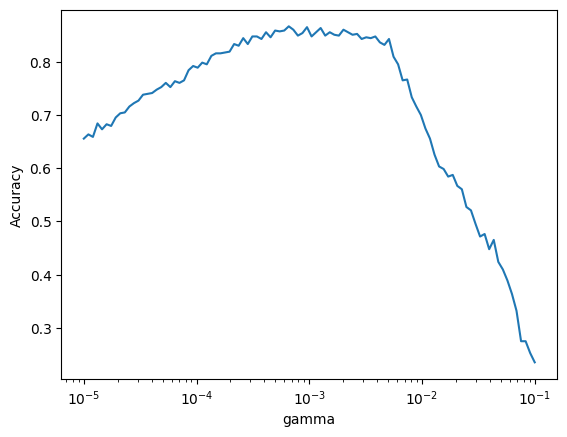

SVC(C=0.0006579332246575682)

In [ ]:
################################################################################
# Smoothing parameter of the RB-SVM classifier
################################################################################
print("----- RB-SVM classifier - Smoothing parameter -----")
gg = np.logspace(-5, -1, 100)
acc = []

for g in gg:
    print('---- gamma =', g)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(kernel='rbf', gamma=g)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("Optimal gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'rbf')
clf.fit(x, y)

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.8206349206349206
---- k = 2
ACC: 0.7809523809523808
---- k = 3
ACC: 0.7857142857142857
---- k = 4
ACC: 0.8047619047619048
---- k = 5
ACC: 0.8047619047619048
---- k = 6
ACC: 0.7952380952380953
---- k = 7
ACC: 0.7920634920634919
---- k = 8
ACC: 0.7873015873015873
---- k = 9
ACC: 0.7888888888888889
---- k = 10
ACC: 0.7857142857142856
---- k = 11
ACC: 0.7746031746031745
---- k = 12
ACC: 0.7968253968253969
---- k = 13
ACC: 0.7825396825396825
---- k = 14
ACC: 0.7952380952380953
---- k = 15
ACC: 0.784126984126984
---- k = 16
ACC: 0.7920634920634921
---- k = 17
ACC: 0.7841269841269841
---- k = 18
ACC: 0.7857142857142857
---- k = 19
ACC: 0.788888888888889
---- k = 20
ACC: 0.780952380952381
---- k = 21
ACC: 0.7920634920634921
---- k = 22
ACC: 0.7825396825396826
---- k = 23
ACC: 0.7698412698412699
---- k = 24
ACC: 0.7698412698412698
---- k = 25
ACC: 0.792063492063492
---- k = 26
ACC: 0.7603174603174603
---- k = 27
ACC: 0.7857142857142858


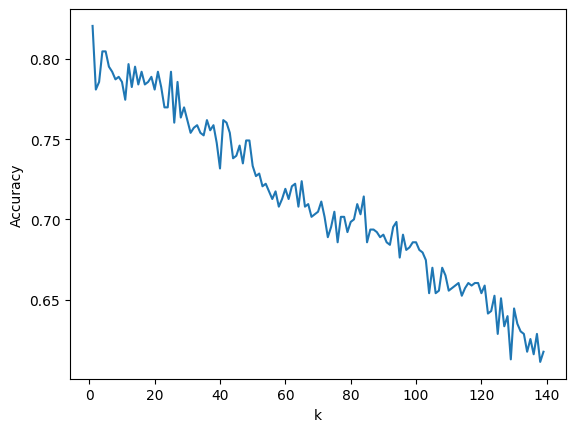

KNeighborsClassifier(n_neighbors=1)

In [ ]:
features = df.columns
n_features = len(features)
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]
################################################################################
# K parameter of the KNN classifier
################################################################################
print("----- KNN classifier - K parameter -----")
kk = np.arange(1, 140)
acc = []

for k in kk:
    print('---- k =', k)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = KNeighborsClassifier(n_neighbors=k)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
print("Optimal k: ", opt_hyperparameter)

plt.plot(kk, acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = KNeighborsClassifier(n_neighbors=opt_hyperparameter)
clf.fit(x, y)


## 4. Prepara tus modelos para producción haciendo lo siguiente:
Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.8571428571428573
---- C = 0.0010974987654930556
ACC: 0.8603174603174603
---- C = 0.0012045035402587824
ACC: 0.8619047619047618
---- C = 0.0013219411484660286
ACC: 0.8619047619047618
---- C = 0.0014508287784959402
ACC: 0.8619047619047621
---- C = 0.0015922827933410922
ACC: 0.8619047619047618
---- C = 0.001747528400007683
ACC: 0.8761904761904763
---- C = 0.0019179102616724887
ACC: 0.8746031746031747
---- C = 0.00210490414451202
ACC: 0.8666666666666666
---- C = 0.0023101297000831605
ACC: 0.8619047619047618
---- C = 0.0025353644939701114
ACC: 0.865079365079365
---- C = 0.0027825594022071257
ACC: 0.86984126984127
---- C = 0.0030538555088334154
ACC: 0.8793650793650795
---- C = 0.003351602650938841
ACC: 0.8666666666666666
---- C = 0.0036783797718286343
ACC: 0.8634920634920636
---- C = 0.004037017258596553
ACC: 0.8682539682539684
---- C = 0.004430621457583882
ACC: 0.8682539682539684
---- C = 0.004862601580065354
ACC: 0

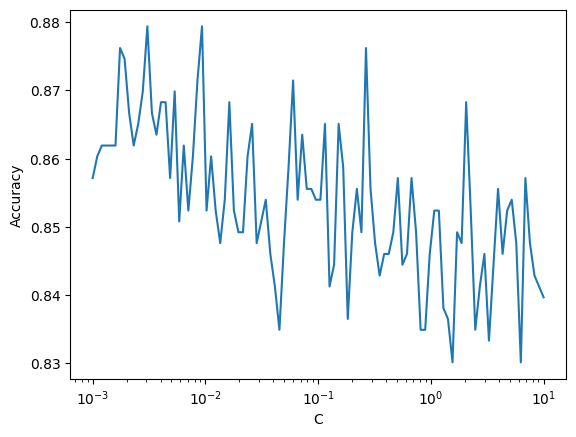

SVC(C=0.0030538555088334154, kernel='linear')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features = df.columns
n_features = len(features)
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]

# Regularization parameter of the linear SVM classifier
print("----- SVM classifier - Regularization parameter -----")

# Crear un array de valores de C espaciados logarítmicamente
cc = np.logspace(-3, 1, 100)
acc = []

for c in cc:
    print('---- C =', c)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(C=c, kernel='linear')
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal regularization parameter
clf = SVC(C=opt_hyperparameter, kernel='linear')
clf.fit(x, y)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Evaluation the linear SVM classifier with hyperparameter selection for the Wine data set
print("----- Model evaluation -----")

kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    parameters = {'C': np.logspace(-3, 1, 100)}
    clf_cv = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
    clf_cv.fit(x_train, y_train)
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Model evaluation with cross_val_predict
print("----- Model evaluation with cross_val_predict -----")

clf = GridSearchCV(SVC(kernel='linear'), {'C': np.logspace(-3, 1, 100)}, cv=5)
y_pred = cross_val_predict(clf, x, y, cv=5)
print(classification_report(y, y_pred))

# Production model
print("----- Production model -----")

clf = GridSearchCV(SVC(kernel='linear'), {'C': np.logspace(-3, 1, 100)}, cv=5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Model evaluation -----
              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92        90
         2.0       0.71      0.86      0.78        90
         3.0       0.95      0.96      0.95        90
         4.0       0.94      0.87      0.90        90
         5.0       0.79      0.76      0.77        90
         6.0       0.89      0.72      0.80        90
         7.0       0.89      0.98      0.93        90

    accuracy                           0.87       630
   macro avg       0.87      0.87      0.86       630
weighted avg       0.87      0.87      0.86       630

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.91      0.91      0.91        90
         2.0       0.63      0.80      0.71        90
         3.0       0.96      0.94      0.95        90
         4.0       0.91      0.88      0.89        90
         5.0       0.76      0.78      0.77        

Contesta lo siguientes:
**¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**
Como en el ejercicio anterior, al comparar el accuracy de un modelo con los datos originales, y con los datos balanceados usando Upsampling, weighted loss function, y Subsampling, vimos que el modelo no mejoraba si balanceabamos los datos, llegando a la conclusión que los datos no eran una muestra desbalanceada.

**¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**
Los mejores clasificadores fueron el linear SVM y el RBF SVM. De estos dos yo me iría por el linear SVM, que ha pesar de ser minimamente peor que el RBF, es mas rápido y tiene casi el mismo rendimeinto que uno más complejo como lo es el RBF. Lo que es claro que que no podemos usar modelos lineales porque los datos no tienen relaciones lineales.

**¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**
Si se observa una mejora, por más minimia que sea. Sin embargo era de esperarse ya que al optimizar los hiperparámetros, el objetivo es mejorar el rendimiento del modelo de la mejor manera posible, incluso si las mejoras son mínimas. Esto es similar a mejorar un coche de fórmula 1 para obtener un rendimiento óptimo en cada detalle. Cada pequeña mejora puede ser importante en aplicaciones donde la precisión y el rendimiento son críticos.

**¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**
El más comun es el costo computacional. Sobre todo si se estra trabajando con una base de datos muy grande. La búsqueda de hiperparámetros generalmente implica entrenar y evaluar el modelo con diferentes combinaciones de valores hiperparámetros. Esto puede ser intensivo en recursos computacionales y llevar mucho tiempo, especialmente si se están explorando múltiples combinaciones.
otro inconveniente muy comun es que encontrar hiperparámetros óptimos en un conjunto de datos específico no garantiza que el modelo funcione bien en otros conjuntos de datos. Puede llevar a un modelo demasiado específico que no sea generalizable